# ***Business Analytics : Sample Superstore 2.0***

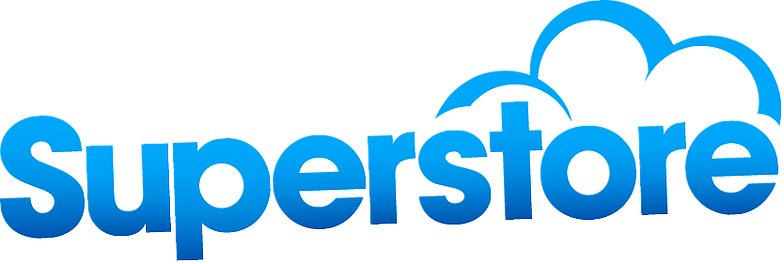

## **About Superstore :-**

##### **The online sector, referred to as “clicks,” has been slowly eating up market share in the past two decades.**

##### **E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.**




### **"Our task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth."**

## ***We expect following Q/As from the Business point of view : -***



* **Which Category is Best Selling and Most Profitable?**

* **What are the Best Selling and Most Profitable Sub-Category?**

* **Which is the Top Selling Sub-Category?**

* **Which Customer Segment is Most Profitable?**

* **Which is the Preferred Ship Mode?**

* **Which Region is the Most Profitable?**

* **Which City has the Highest Number of Sales?**

#### ***Let suppose that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business. Moreover people who are not expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.***

## **We will import the required libraries and read in the data set.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('SampleSuperstore.csv')

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Now, we will see the length of the data table and its info, also the statistics summary**

In [ ]:
df.shape

(9993, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [ ]:
df.describe().T.style.background_gradient(subset=['25%','75%'], cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
Postal Code,9993.000000,55186.627539,32063.103801,1040.000000,23223.000000,56301.000000,90008.000000,99301.000000
Sales,9993.000000,229.856670,623.276273,0.444000,17.280000,54.480000,209.940000,22638.480000
Quantity,9993.000000,3.789753,2.225149,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9993.000000,0.156218,0.206456,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9993.000000,28.652464,234.271411,-6599.978000,1.728000,8.662000,29.364000,8399.976000


## ***Handling the missing values***

In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**It seems no missing values were there**

## ***Superstore 2.0 : Exploratory Data Analysis***

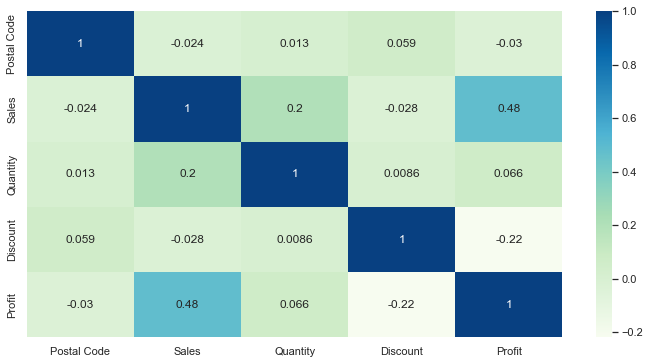

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

##### ***From above heatmap we observed that Profits, Sales and Quantity these features/columns have strong bond, which means any slight change in any of these will impact the business***




### **Then, we will find out whether there is duplicate data.**

In [ ]:
# Find the number of duplicate data

df.duplicated().sum()

17

***Result shows that there are 17 duplicated rows.***

## ***We will now drop the duplicated rows***

In [ ]:
 # Drop the duplicated rows

df.drop_duplicates(inplace = True)

# Find the no. of rows and columns
df.shape

(9976, 13)

**We can confirm that the duplicated rows have been dropped as the rows were 9994 before and now it’s reduced to 9977 rows.**

## ***Now, we will create a calculated field for Profit Margin, formula is (Profit / Sales) * 100***

In [ ]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [ ]:
# Get descriptive statistics summary

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9976,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9976,3,Consumer,5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9976,1,United States,9976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9976,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9976,49,California,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9976.0,NaN,NaN,NaN,55151.202285,32057.671463,1040.0,23223.0,55901.0,90008.0,99301.0
Region,9976,4,West,3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9976,3,Office Supplies,6011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9976,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9976.0,NaN,NaN,NaN,230.147597,623.752659,0.444,17.295,54.804,209.97,22638.48


***You will see ‘NaN’ in some of the categorical columns and that’s perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.***

**What we want to focus is the unique count and frequency of the categorical features such as**

* **There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.**

* **The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.**



**While for numerical parameters, it’s interesting to note that the**

* ***75% of orders makes at least 36% profit margin.***

* ***Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.***

## ***A. Which Category is Best Selling and Most Profitable?***

In [ ]:
 # Group sales, profit and quantity by category

df1 = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

df1

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718492.0840,122291.7128,22859
Technology,836154.0330,145454.9481,6939


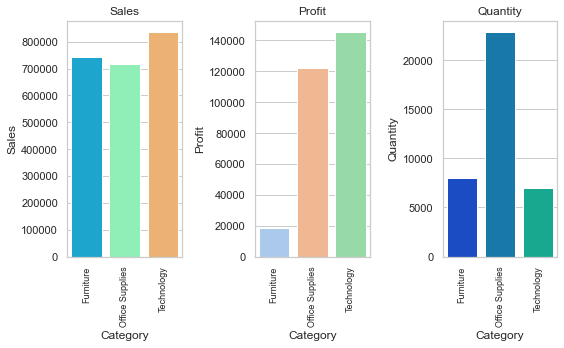

In [ ]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

### **Our observations are:**


* **All 3 categories — Furniture and Office Supplies were make similar amount of sales but Technology amount of sales was way far**

* **Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.**

* **Furniture is the least profitable and quantity sold are at a minimum too.**

* **Office Supplies sells the most in terms of quantity as it is relatively cheap product.**

## ***B. What are the Best Selling and Most Profitable Sub-Category?***

In [ ]:
# Group by sub-category

df2 = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales

subcat_df2 = pd.DataFrame(df2.sort_values('Sales', ascending = False))

subcat_df2

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [ ]:
 # Sort by descending order according to profit

subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = False))

subcat_profit_df2

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107289.0010,18065.0574
Furnishings,91683.0240,13052.7230


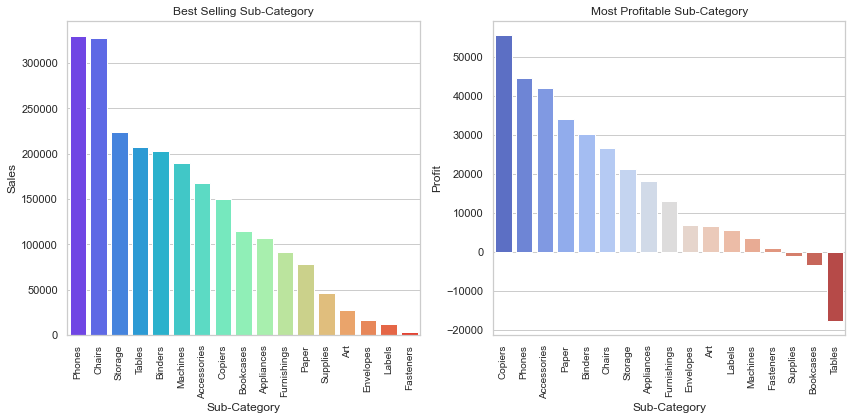

In [ ]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

### **Let’s analyse the bar plots:**

* **Phones and Chairs are Top 2 best selling sub-category.**

* **Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.**

* **On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.**

## ***C. Which is the Top Selling Sub-Category?***

In [ ]:
df3 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

df3

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1727


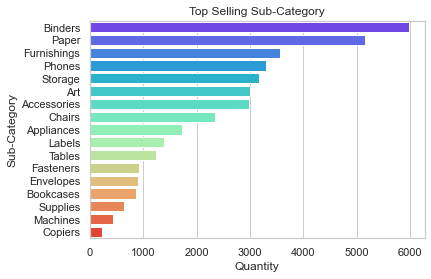

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, y = df3.index, x = df3.Quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()

### **Here, we can deduce that**

* **Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.**

* **Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.**

## ***D. Which Customer Segment is Most Profitable?***

In [ ]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())

df4

,Profit
Segment,
Consumer,133934.4933
Corporate,91954.9798
Home Office,60279.0015


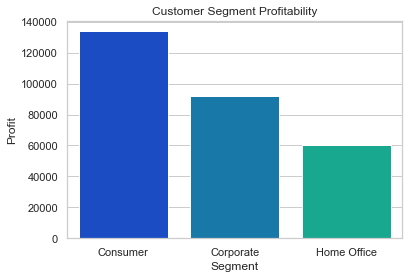

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

**Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.**

## ***E. Which is the Preferred Ship Mode?***

D:\YogsProgramsFile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


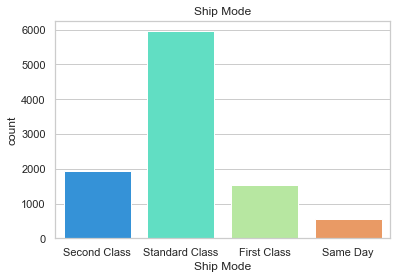

In [ ]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(df['Ship Mode'], palette = "rainbow")

plt.title("Ship Mode")

plt.show()

**By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.**

## ***F. Which Region is the Most Profitable?***

In [ ]:
df5 = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())

df5

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108256.8599


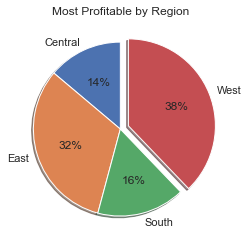

In [ ]:
explode = [0, 0, 0, 0.1]
plt.pie(df5.Profit, labels = df5.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)

plt.title("Most Profitable by Region")

plt.show()

#### **East and West region are most profitable.**

## ***G. Which City has the Highest Number of Sales?***

In [ ]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))

top10 = city_sales_df[:10]

top10

C:\Users\Owner\AppData\Local\Temp\ipykernel_13592\2369898876.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [ ]:
bottom10 = city_sales_df[-10:]

bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


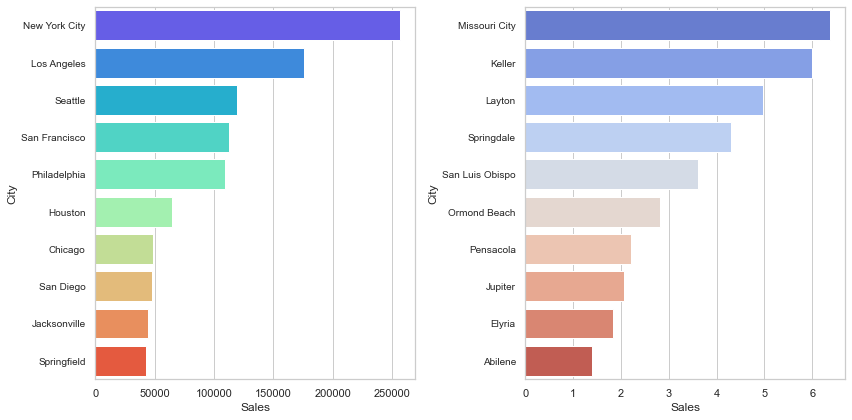

In [ ]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))

sns.set_theme(style="whitegrid")


top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "rainbow", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots

figure.tight_layout()
plt.show()

#### **The above left bar garph shows the top 10 cities and right side shows the bottom 10 cities**

#### **There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.**